In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## In this notebook, we will come up with all the preprocessing 

In this notebook we want to study the gemstone price data set

In [183]:
# Load training data
train_df = pd.read_csv('train.csv')
# drop index since we don't need it
train_df = train_df.drop(columns='id')

# We will load the original data since it helps with the predicitoj
original_df = pd.read_csv("cubic_zirconia.csv")

# Impute data and then merge them
original_df['depth'] = original_df['depth'].fillna(2*original_df['z']/(original_df['x']+original_df['y']))
original_df = original_df.drop(columns='Unnamed: 0')

# concat the two dataframes
train_df = pd.concat([train_df, original_df])

# preprocessing
cut_labeling = {col: val for val, col in enumerate(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])}
color_labeling = {col: val for val, col in enumerate(['J', 'I', 'H', 'G', 'F', 'E', 'D'])}
clarity_labeling = {col: val for val, col in enumerate(
    ['I3', 'I2', 'I1', 'SI2', 'SI1', 'VVS2', 'VVS1', 'VS2', 'VS1', 'IF', 'FL'])}
# to preprocess label features, map label to integer number.
def preprocessing(df):
    df['cut'] = df['cut'].map(cut_labeling)
    df['color'] = df['color'].map(color_labeling)
    df['clarity'] = df['clarity'].map(clarity_labeling)
    return df

train_df = preprocessing(train_df)


In [185]:
# We can impute several values, but given that we have 19000 data points, we can just drop those 
for key in ['x', 'y', 'z']:
    train_df = train_df.drop(train_df[train_df[key] == 0].index)

So there are some pretty obvious details 

X: Length of the cubic zirconia in mm.
Y: Width of the cubic zirconia in mm.
Z: Height of the cubic zirconia in mm.

Most importantly, these quantities are all related Depth = 2*Z / (X+Y)

We know there are some 0 values in the data, so we can impute these based on the formula

In [186]:
# Let's now create a bunch of new features
def create_features(df):
    # Create new features for learning
    df['volume'] = df['x'] * df['y'] * df['z']  # Volumen of gems
    df['density'] = df['carat'] / df['volume']  # Density of gems
    df['table_percentage'] = (df['table'] / ((df['x'] + df['y']) / 2)) * 100    # The table percentage (of the gem face)
    df['depth_percentage'] = (df['depth'] / ((df['x'] + df['y']) / 2)) * 100    # The depth percentage
    df['symmetry'] = (abs(df['x'] - df['z']) + abs(df['y'] - df['z'])) / (df['x'] + df['y'] + df['z'])  # Symmetry of the gem
    df['surface_area'] = 2 * ((df['x'] * df['y']) + (df['x'] * df['z']) + (df['y'] * df['z']))  # Surface area of gem
    df['depth_to_table_ratio'] = df['depth'] / df['table']  # ratio

    return df

In [187]:
train_df = create_features(train_df)

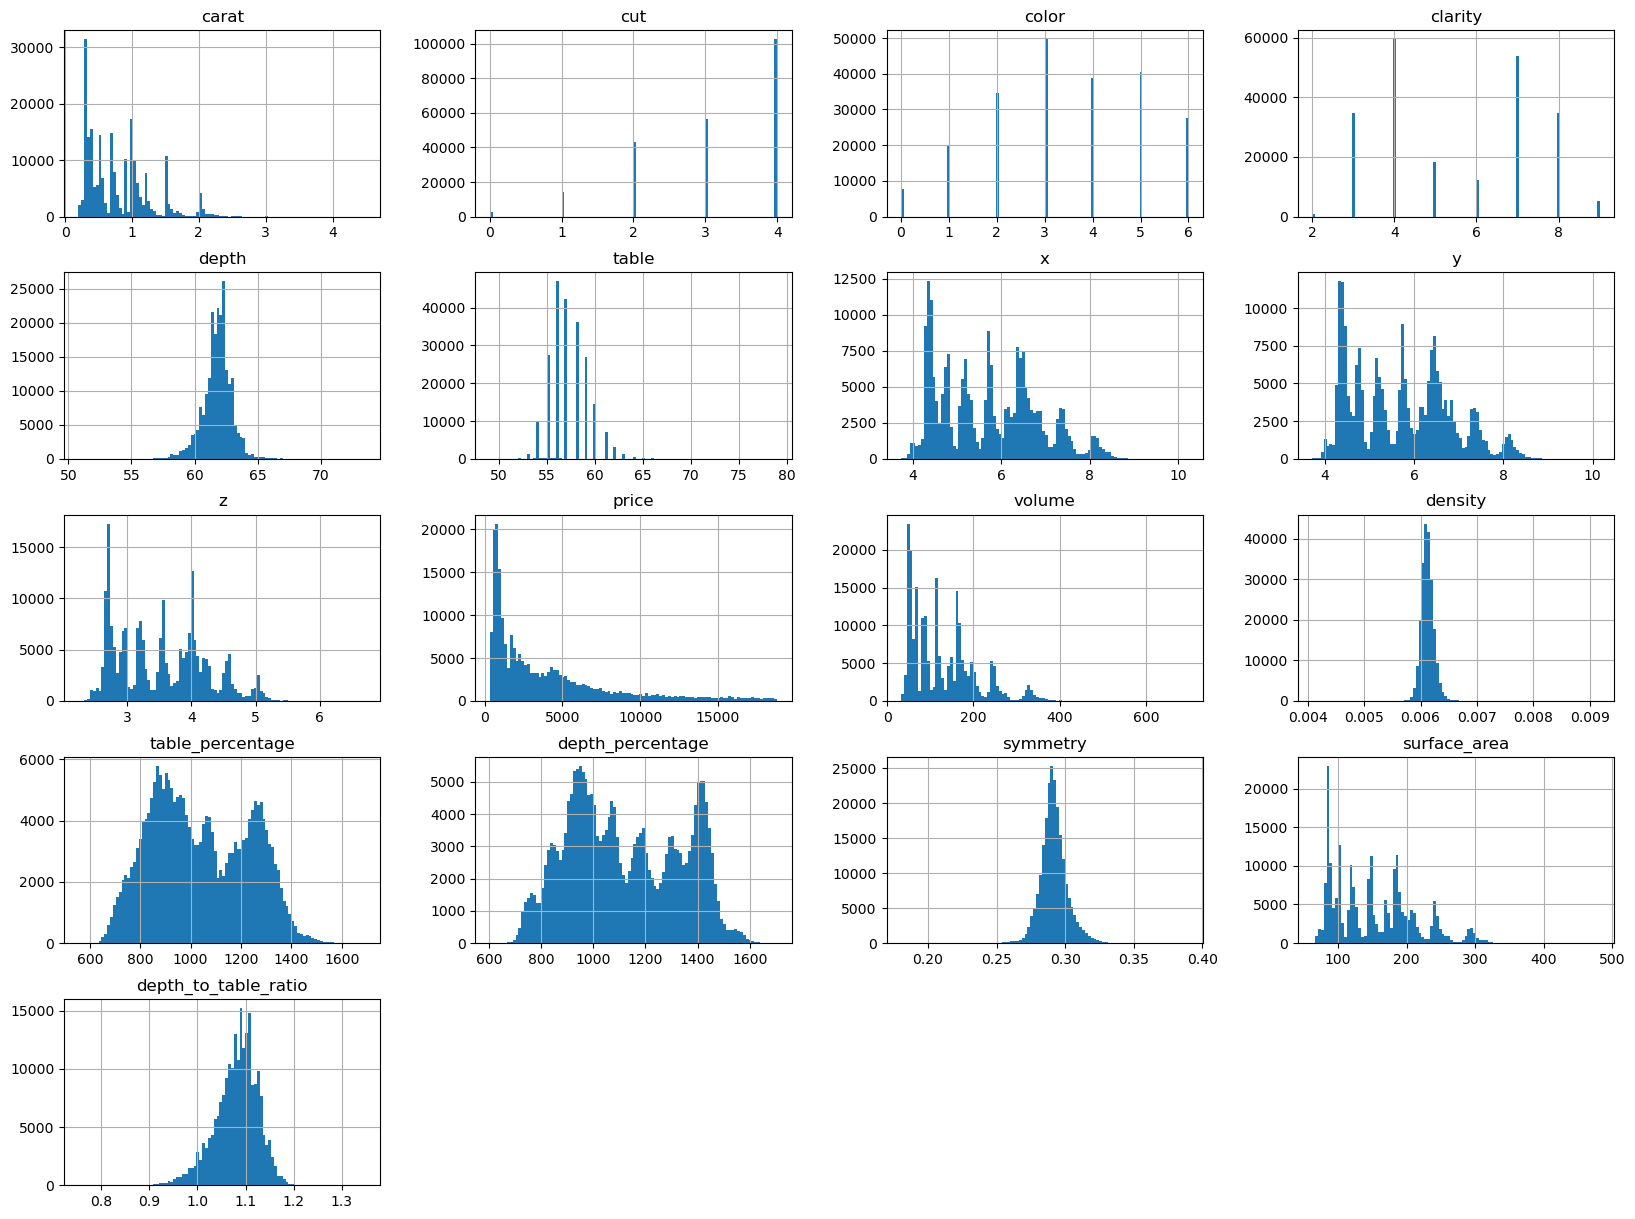

In [192]:
# Let's look at the data and lookf or outliers
train_df.hist(bins=100, figsize=(20, 15))
plt.show()

In [191]:
# So it makes sense to drop density that are far away from the average
train_df.drop(train_df[(train_df['density'] < 0.004)].index, inplace=True)
train_df.drop(train_df[(train_df['density'] > 0.01)].index, inplace=True)

# This could be partially due to symmetry as well
train_df.drop(train_df[(train_df['symmetry'] > 0.4)].index, inplace=True)
train_df.drop(train_df[(train_df['symmetry'] < 0.1)].index, inplace=True)

# Depth to table ration 
train_df.drop(train_df[(train_df['depth_to_table_ratio'] < 0.25)].index, inplace=True)

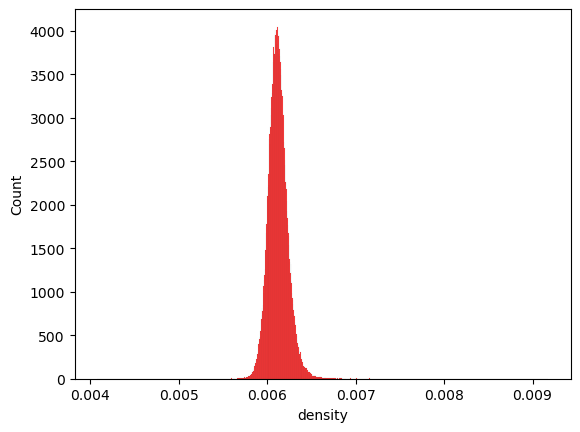

In [193]:
sns.histplot(train_df['density'], color='r')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

In [195]:
# preprocessing
cut_labeling = {col: val for val, col in enumerate(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])}
color_labeling = {col: val for val, col in enumerate(['J', 'I', 'H', 'G', 'F', 'E', 'D'])}
clarity_labeling = {col: val for val, col in enumerate(
    ['I3', 'I2', 'I1', 'SI2', 'SI1', 'VVS2', 'VVS1', 'VS2', 'VS1', 'IF', 'FL'])}
# to preprocess label features, map label to integer number.
def preprocessing(df):
    df['cut'] = df['cut'].map(cut_labeling)
    df['color'] = df['color'].map(color_labeling)
    df['clarity'] = df['clarity'].map(clarity_labeling)
    return df

<Axes: xlabel='x', ylabel='symmetry'>

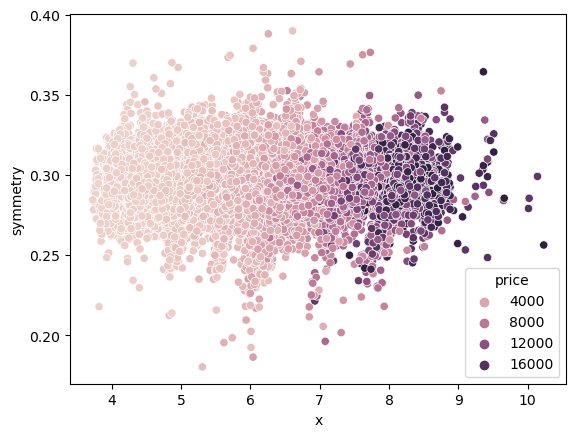

In [196]:
sns.scatterplot(data=train_df, x='x', y='symmetry', hue='price')

In [107]:
train_df['price'].mean()

3968.683018945911